In [38]:
import numpy as np
from PIL import Image

256
256
[]
256
256
[3]


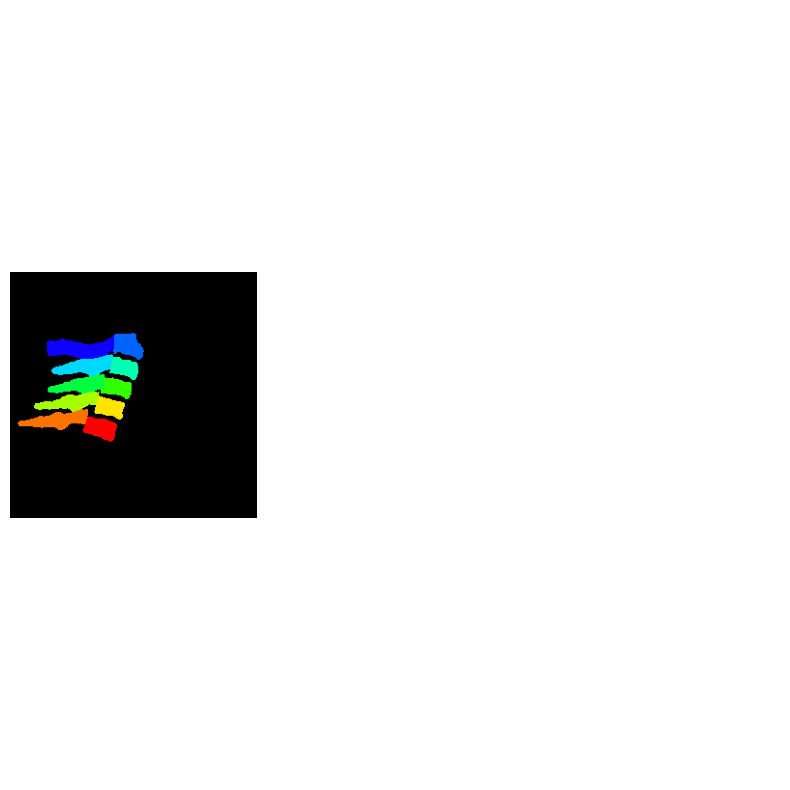

In [66]:
from plotImg import plot_images
#segmentation_image_path = "/home/eric/Documents/cervicalResearchIIP/result_test/abstractresult/thorough/unet1x1/20241029-Conv1x1-16/oN3-4.png"
segmentation_image_path = "/home/eric/Desktop/MVA_2025_Result/N4-7/N4-7MCUNet.png"
original_image_path = "/home/eric/Desktop/MVA_2025_Result/N4-7/N4-7.png"
black_image = np.zeros((256, 256, 3), dtype=np.uint8)

segmentation_image = Image.open(segmentation_image_path)

original_image = Image.open(original_image_path)

segmentation_image = np.array(segmentation_image)

# for darkening original
#segmentation_image = np.zeros_like(original_image)


original_image = np.array(original_image)

#for on black
original_image = black_image


height, width, *channels = segmentation_image.shape
print(height)
print(width)
print(channels)
height, width, *channels = original_image.shape

print(height)
print(width)
print(channels)
plot_img = []

mask_array = np.zeros_like(original_image)

for y in range(height):
    for x in range(width):
        if segmentation_image[y][x] != 0:
            if segmentation_image[y][x] == 1:
                mask_array[y][x] = [13,0,255]
            elif segmentation_image[y][x] == 2:
                mask_array[y][x] = [0,101,255]
            elif segmentation_image[y][x] == 3:
                mask_array[y][x] = [0,217,255]
            elif segmentation_image[y][x] == 4:
                mask_array[y][x] = [0,255,178]
            elif segmentation_image[y][x] == 5:
                mask_array[y][x] = [0,254,64]
            elif segmentation_image[y][x] == 6:
                mask_array[y][x] = [50,255,0]
            elif segmentation_image[y][x] == 7:
                mask_array[y][x] = [166,255,0]
            elif segmentation_image[y][x] == 8:
                mask_array[y][x] = [254, 229, 0]
            elif segmentation_image[y][x] == 9:
                mask_array[y][x] = [254, 115, 0]
            elif segmentation_image[y][x] == 10:
                mask_array[y][x] = [254, 0, 0]
alpha = 1# Transparency level (0.0 to 1.0, where 0 is fully transparent)

# Blend the original image and the mask
blended_array = (alpha * mask_array + (1 - alpha) * original_image).astype(np.uint8)
blended_image = Image.fromarray(blended_array)
plot_img.append(blended_image)
plot_images('None', plot_img)

save_path = "/home/eric/Desktop/MVA_2025_Result/N4-7/N4-7_MCUNetVisual.png"
#modified_image = Image.fromarray(blended_image)
blended_image.save(save_path)